# Assignment 9 - Group Good Awareness
---


## Dataset:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

---


### Question 1:
Load the breast cancer dataset from sklearn datasets and show all target names and features.

Read the documentation for the dataset, this will help
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


### Question 2: 
Visualize the data (scatter) from mean radius and mean smoothness so it shows what characterizes a malignant breast mass from a benign breast mass. Explain what you see.


### Question 3: <font color=red>(Red Assignment)</font>
Visualize breast mass feature importance.
Show which breast mass features that weigh the most in breast cancer detection. 

Use this
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

---

### Review Question 1:

Was data loaded and target names and features shown correctly?
Use datasetname.DESCR to see info about a dataset to verify


### Review Question 2:

Was the data visualized in a meaningful way (different colors & labels) with mean radius and mean smoothness?
Does the explaination describe the visualization in an understandable way? If not why not?


### Review Question 3:

Was the feature importa


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Question 1

In [42]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets


bc = datasets.load_breast_cancer()
print(bc.target_names)
print(bc.feature_names)
print(bc.DESCR)

# Question 2

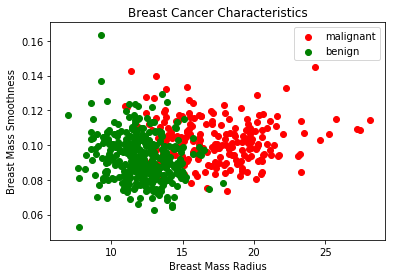

In [59]:
colors = 'rgb'
for idx, name in enumerate(bc.target_names):

    mean_radius = bc.data[bc.target == idx][:,0]
    mean_smoothness = bc.data[bc.target == idx][:,4]

    plt.scatter(mean_radius, mean_smoothness, c=colors[idx], label=name)

plt.title('Breast Cancer Characteristics')
plt.xlabel('Breast Mass Radius')
plt.ylabel('Breast Mass Smoothness')

plt.legend()
plt.show()

The visualization shows that malignant breast mass generally has a larger radius, and that benign breast mass generally has a smaller radius, but the smoothness is almost the same as the benign breast mass. 

# Question 3

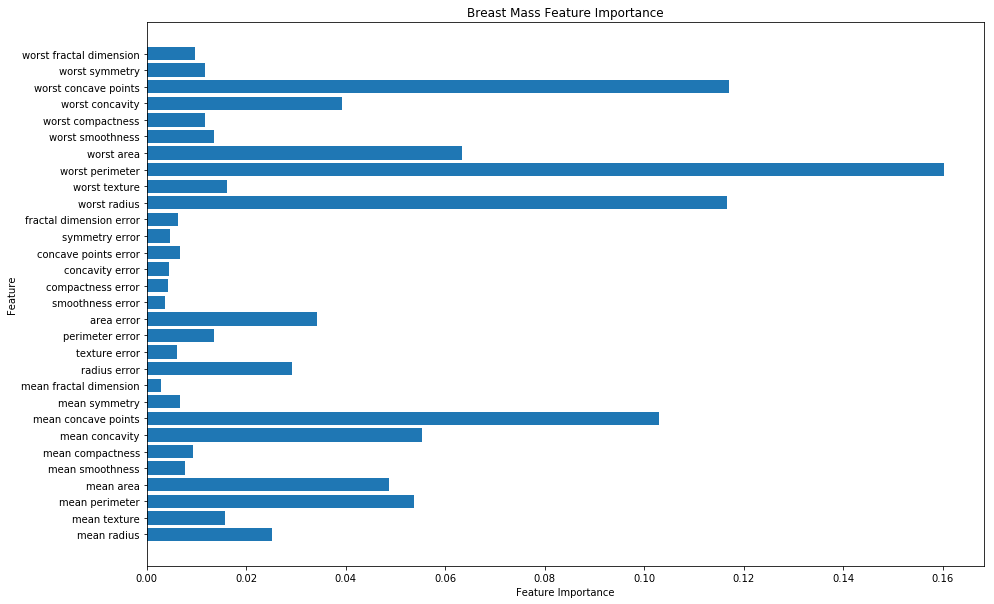

In [130]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.model_selection import train_test_split

# Create training and test data sets
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#Feature Importance
n_feature = bc.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')


plt.yticks(np.arange(n_feature), bc.feature_names)
plt.rcParams["figure.figsize"] = [15,10]
plt.title('Breast Mass Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()